In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mproc

sys.path.append(os.path.join(os.path.dirname('__file__'), '../'))

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


In [2]:
X = np.arange(0,10,0.1)
np.random.shuffle(X)
Y = noise.Gauss(dim=X.shape[0],n=1).generate() + X

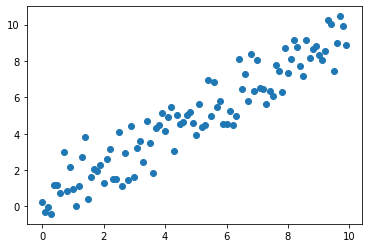

In [3]:
plt.scatter(X,Y)

In [4]:
a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)

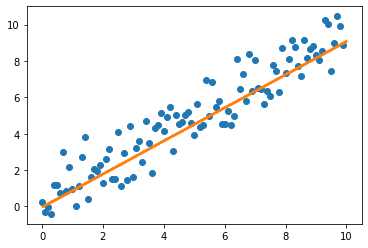

In [5]:

x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

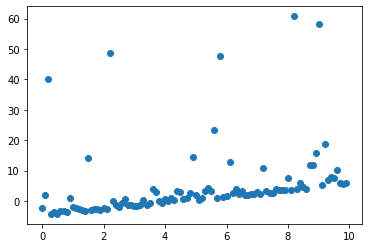

In [6]:
X = np.arange(0,10,0.1)
np.random.shuffle(X)
Y = noise.LogNormal(dim=X.shape[0],n=1,sigma=2.0).generate() + X
plt.scatter(X,Y)

1.0670167430956694

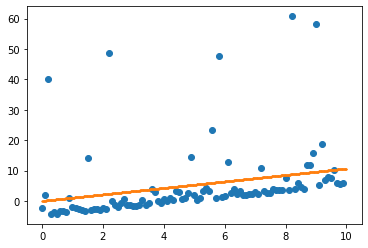

In [7]:

b = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)

x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

core.w

In [8]:
a = np.array([[2., 3., 8.], [10., 4., 3.], [2., 3., 7.]])

if __name__ == "__main__":

        # 自分のマシンでコアが４or6
    cpu_count = mproc.cpu_count()
    n = 60
    X = np.linspace(0,10,n)
    np.random.shuffle(X)
    Y = noise.LogNormal(dim=X.shape[0],n=1,sigma=2.0).generate() + X
    data = [X,Y]

    a,b = -5, 5

    # 同じ初期値でスタート
    w = (b - a) * np.random.rand(cpu_count) + a
    core_store = []
    mypool = mproc.Pool(cpu_count)
    for i in range(cpu_count):
        core_n = n // cpu_count
        core = algo_sgd.SGD(w_init=w[i],a=0.001,t_max=99,data=[X[i:core_n-1],Y[i:core_n-1]])
        core_store.append(core)

    # first_result = np.array(mypool.map(func=sgd_update, iterable=w))



    # Memory management.
    mypool.close() # important for stopping memory leaks.
    mypool.join()

In [9]:
core_store = []
model_store = []
core_num = 10
a,b = -5, 5
son = loss.LinearQuadraticLoss()
for i in range(core_num):
    X = np.arange(0,10,0.1)
    np.random.shuffle(X)
    Y = noise.Gauss(dim=X.shape[0],n=1).generate() + X
    data = [X,Y]
    w = (b - a) * np.random.rand() + a
    core = algo_sgd.SGD(w_init=w,a=0.001,t_max=99,data=data)
    for _ in core:
        core.update(son)
    core_store.append(core)
    model_store.append(core.w)

model_store = np.array(model_store)



In [10]:
model_store = model_store.reshape([-1,1])
merge.median(model_store)

array([0.89236752])

In [11]:
merge.geomed(model_store)



array([0.89415834])

In [12]:
merge.smallball(model_store)

array([0.94034139])